<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Backtracking:-Searching-with-Pruning" data-toc-modified-id="Backtracking:-Searching-with-Pruning-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Backtracking: Searching with Pruning</a></span><ul class="toc-item"><li><span><a href="#Xuefei-Liu" data-toc-modified-id="Xuefei-Liu-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Xuefei Liu</a></span><ul class="toc-item"><li><span><a href="#2021-02-13" data-toc-modified-id="2021-02-13-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>2021-02-13</a></span></li></ul></li></ul></li><li><span><a href="#What-is-backtracking?" data-toc-modified-id="What-is-backtracking?-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>What is backtracking?</a></span></li><li><span><a href="#An-example:-Rats-in-a-maze" data-toc-modified-id="An-example:-Rats-in-a-maze-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>An example: Rats in a maze</a></span></li><li><span><a href="#Comparison-with-other-recursive-algos-?" data-toc-modified-id="Comparison-with-other-recursive-algos-?-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Comparison with other recursive algos ?</a></span></li><li><span><a href="#Comparison-with-other-search-algos-such-as-DFS?" data-toc-modified-id="Comparison-with-other-search-algos-such-as-DFS?-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Comparison with other search algos such as DFS?</a></span></li><li><span><a href="#What-kinds-of-questions-you-may-want-to-use-backtracking?" data-toc-modified-id="What-kinds-of-questions-you-may-want-to-use-backtracking?-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>What kinds of questions you may want to use backtracking?</a></span></li><li><span><a href="#Classic-Backtracking-problems" data-toc-modified-id="Classic-Backtracking-problems-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Classic Backtracking problems</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#1.-N-queens" data-toc-modified-id="1.-N-queens-7.0.1"><span class="toc-item-num">7.0.1&nbsp;&nbsp;</span>1. N queens</a></span></li><li><span><a href="#2.-Hamiltonian-Cycle" data-toc-modified-id="2.-Hamiltonian-Cycle-7.0.2"><span class="toc-item-num">7.0.2&nbsp;&nbsp;</span>2. Hamiltonian Cycle</a></span></li></ul></li></ul></li><li><span><a href="#What-is-the-template-for-backtracking？" data-toc-modified-id="What-is-the-template-for-backtracking？-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>What is the template for backtracking？</a></span></li><li><span><a href="#How-to-design-the-back-function?" data-toc-modified-id="How-to-design-the-back-function?-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>How to design the back function?</a></span></li><li><span><a href="#Common-mistakes-in-backtracking-when-using-Python" data-toc-modified-id="Common-mistakes-in-backtracking-when-using-Python-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Common mistakes in backtracking when using Python</a></span></li><li><span><a href="#BackTracking-with-Memoization" data-toc-modified-id="BackTracking-with-Memoization-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>BackTracking with Memoization</a></span></li><li><span><a href="#Practice-Problems" data-toc-modified-id="Practice-Problems-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Practice Problems</a></span></li></ul></div>

# Backtracking: Searching with Pruning
## Xuefei Liu
### 2021-02-13

---
# What is backtracking?
Backtracking is a general algorithm for finding all (or some) solutions to some computational problems, that incrementally builds candidates to the solutions, and abandons a candidate ("backtracks") as soon as it determines that the candidate cannot possibly be completed to a valid solution

# An example: Rats in a maze
Maze is given as N*N binary matrix of blocks where source block is the upper left most block i.e., maze[0][0] and destination block is lower rightmost block i.e., maze[N-1][N-1]. A rat starts from source and has to reach the destination. The rat can move in four directions.

In the maze matrix, 0 means the block is a dead end and 1 means the block can be used in the path from source to destination. Return all the possible paths the rat can escape the maze. (The positions in the path should be distinct)

In [19]:
from IPython.display import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams

%matplotlib inline

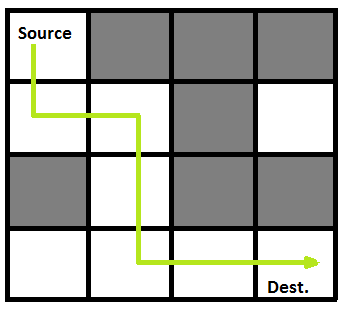

In [20]:
Image(filename='ratinmaze_filled_path1.png') 

In [74]:
# 检查当前位置是否有效
# 如果当前位置为0，则表示不能通过；
# 如果当前位置表示为1，则表示可以继续通过
def isValid(nums, current_position):
    '''
    :param nums: List[List[int]]-->指代所给的迷宫
    :param current_position: List[int X, Y]-->指代当前坐标点位置
    :return: boolean-->指代当前位置是否有效
    '''
    
    pos_x = current_position[0]
    pos_y = current_position[1]
    if pos_x in range(len(nums)) and pos_y in range(len(nums)) and nums[pos_x][pos_y] == 1:
        return True
    else:
        return False


"""
迷宫问题，使用回溯法
"""
def maze(nums, start):
    """
    :param nums: List[List[int]]-->指代所给的迷宫
    :param start: List[int X, Y]-->指代起始点位置
    :return: route: List[]
    """
    # 定义最终路线的集合
    route = []
    # 定义当前点上下左右移动方向的集合
    walk_route = [[-1, 0], [0, -1], [1, 0], [0, 1]]
    # 获取迷宫的终点
    nums_length = len(nums)
    final_position = [nums_length-1, nums_length-1]

    def back(position, pos_list):
        # 该递归函数的出口
        if position == final_position:
            route.append(list(pos_list))
            return
        pos_x = position[0]
        pos_y = position[1]
        for direction in walk_route:
            next_position = [pos_x+direction[0], pos_y+direction[1]]
            
            if isValid(nums, next_position):
                pos_list.append(next_position)
                nums[pos_x][pos_y] = 0
                back(next_position, pos_list)
                # 如果没有找到出口，则将当前上一个位置0重置为1，回溯
                nums[pos_x][pos_y] = 1
                pos_list.pop()
    
    pos_list = [start]

    back(start,pos_list)
    return route


In [75]:
from colorama import init, Fore
# colorama needs to be initialized in order to be used
init()
def print_maze(maze):
    for i in range(0, len(maze)):
        for j in range(0, len(maze[0])):
            if maze[i][j] == '1':
                print(Fore.WHITE, f'{maze[i][j]}', end="")
            else:
                print(Fore.RED, f'{maze[i][j]}', end="")
        print('\n')
nums = [[1, 0, 0, 1, 0, 1], [1, 1, 1, 0, 1, 0], [0, 0, 1, 0, 1, 0], [0, 1, 1, 1, 0, 0], [0, 0, 0, 1, 1, 1],[1, 0, 0, 0, 1, 1]]
current_position = [0, 0]
print_maze(nums)

 1 0 0 1 0 1

 1 1 1 0 1 0

 0 0 1 0 1 0

 0 1 1 1 0 0

 0 0 0 1 1 1

 1 0 0 0 1 1



In [76]:
print(maze(nums, current_position))

[[[0, 0], [1, 0], [1, 1], [1, 2], [2, 2], [3, 2], [3, 3], [4, 3], [4, 4], [5, 4], [5, 5]], [[0, 0], [1, 0], [1, 1], [1, 2], [2, 2], [3, 2], [3, 3], [4, 3], [4, 4], [4, 5], [5, 5]]]


# Comparison with other recursive algos ?
1. Divide and Conquer: Problem reduced to multiple independent sub-problems
that are solved separately. Conquer step puts together solution for bigger problem.
Examples: Closest pair, deterministic median selection, quick sort.
2. Dynamic Programming: problem reduced to multiple (typically) dependent or
overlapping sub-problems. Use memoization to avoid recomputation of common
solutions leading to iterative bottom-up algorithm
3. Backtracking: Refinement of brute force search. Build solution incrementally by
invoking recursion to try all possibilities for the decision in each step and using pruning to avoid impossible solution

# Comparison with other search algos such as DFS?

DFS is very similar with backtracking and both are searching recursively to find a path. I think backtracking is a more general purpose algorithm applied to different problem space. DFS is more specific to tree/graph traversing. 
But in general I think these two share the same philosophy: Exploring wisely

# What kinds of questions you may want to use backtracking?

- Return all possible solutions
- Constrained searching (shortest path in a maze, coloing map, etc)

Top 20 backtracking interview question:

https://www.geeksforgeeks.org/top-20-backtracking-algorithm-interview-questions/


1. N Queens Problem (all possible solutions)
2. Warnsdorff’s Algorithm Knight’s tour problem (Constrained searching)
3. Word Break Problem (all possible solutions)
4. Remove Invalid Parenthesis (all possible solutions)
5. Match a pattern and string using regular expression (Constrained searching)
6. Find Path from corner cell to middle cell in a maze (Constrained searching)
7. Hamiltonian cycle (Constrained searching)
8. Sudoku (Constrained searching)
9. M Coloring Problem (Constrained searching)
10. Rat in a Maze (Constrained searching)
11. Print all permutations of a given string (all possible solutions)
12. Crptarithmetic puzzle (Constrained searching)
13. Find if there is a path of more than k length from a source (Constrained searching)
14. Shortest safe route in a path with landmines (Constrained searching)
15. Partition of a set into k subsets with equal sum (all possible solutions)
16. longest possible route in a matrix with hurdles (Constrained searching)
17. Print palindromic partitions string (all possible solutions)
18. Print all possible paths from top left to bottom right of a mXn matrix (all possible solutions)
19. Subset sum (all possible solutions)
20. Tug of war (Constrained searching)


# Classic Backtracking problems

### 1. N queens
The n-queens puzzle is the problem of placing n queens on an n x n chessboard such that no two queens attack each other.

Given an integer n, return all distinct solutions to the n-queens puzzle.

Each solution contains a distinct board configuration of the n-queens' placement, where 'Q' and '.' both indicate a queen and an empty space, respectively.



Input: n = 4
Output: [[".Q..","...Q","Q...","..Q."],["..Q.","Q...","...Q",".Q.."]]

Explanation: There exist two distinct solutions to the 4-queens puzzle as shown above

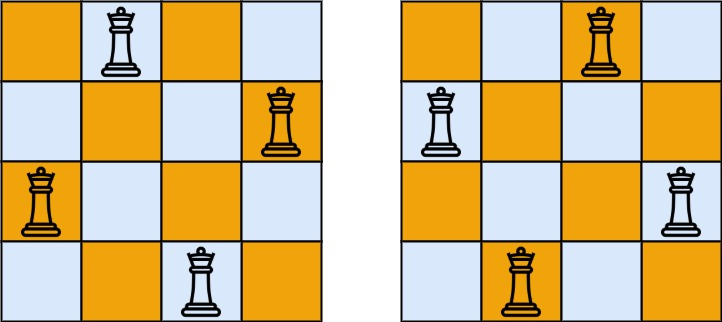

In [90]:
Image(filename='queens.jpg') 

In [18]:
# 检测皇后之间的位置关系
def conflict(queen_str, current_queen):
    """
    :param queen_str: str-->指代当前皇后存放之前的所有皇后的集合
    :param current_queen: int-->指代当前皇后想要存放的位置
    :return:Flag: boolean-->指代当前位置的皇后是否与之前所有位置的皇后有冲突
    """
    # 此处的queen_length既是之前保存的queen_list集合的长度，也可以理解为当前current_queen皇后的行下标
    queen_length = len(queen_str)
    # 定义是否有位置冲突的标签
    Flag = False
    for index in range(queen_length):
        # queen_length - index控制新的queen的位置和之前的queen位置不在同一列也不在对角线
        if abs(current_queen-int(queen_str[index])) in(0, queen_length-index):
            Flag = True
            break
    return Flag

def solveNQueens(nums):
    """
    :type n: int
    :rtype: List[List[str]]
    """
    queen_str=""
    final_queens = []

    # 定义递归函数，获取所有八皇后的值
    def back(queen_str):
        # 出口条件
        if len(queen_str) == nums:
            final_queens.append(queen_str)
            return
        for index in range(nums):
            Flag = conflict(queen_str, index)
            # 如果当前位置的皇后是否与之前所有位置的皇后没有冲突，则执行下述代码
            if Flag is False:
                back(queen_str+str(index))
            #这种写法隐含了backtrack的逻辑,如果有冲突则不执行if语句，即queen_str不变
            
    back(queen_str)

    return final_queens

solveNQueens(4)

['1302', '2031']

Complexity Analysis

- Time complexity : $\mathcal{O}(N!)$. There is N possibilities to put the first queen, not more than N - 2 to put the second one, not more than N - 4 for the third one etc. 
In total that results in $\mathcal{O}(N!)$ time complexity.

- Space complexity : $\mathcal{O}(N)$ to keep an information about diagonals and rows.

### 2. Hamiltonian Cycle
Hamiltonian Path in an undirected graph is a path that visits each vertex exactly once. A Hamiltonian cycle (or Hamiltonian circuit) is a Hamiltonian Path such that there is an edge (in the graph) from the last vertex to the first vertex of the Hamiltonian Path. Determine whether a given graph contains Hamiltonian Cycle or not. If it contains, then prints the path.(don't need to return all paths)

Input:
A 2D array graph[V][V] where V is the number of vertices in graph and graph[V][V] is adjacency matrix representation of the graph. A value graph[i][j] is 1 if there is a direct edge from i to j, otherwise graph[i][j] is 0.

Output:
An array path[V] that should contain the Hamiltonian Path. path[i] should represent the ith vertex in the Hamiltonian Path. The code should also return false if there is no Hamiltonian Cycle in the graph.

For example, a Hamiltonian Cycle in the following left graph is {0, 1, 2, 4, 3, 0}.

And the right graph doesn’t contain any Hamiltonian Cycle.


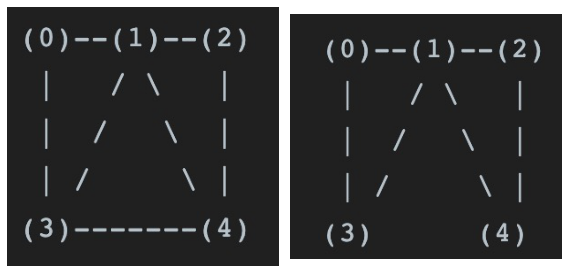

In [15]:
rcParams['figure.figsize'] = 8 ,8
img_A = mpimg.imread('1613170865172.jpg')
img_B = mpimg.imread('1613170983147.jpg')
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_A)
ax[1].imshow(img_B)
ax[0].axis('off')
ax[1].axis('off')
fig.tight_layout()

In [14]:
class Graph():  
    def __init__(self, vertices):  
        self.graph = [[0 for column in range(vertices)] 
                            for row in range(vertices)]  
        self.V = vertices  
        self.result = []

    def isSafe(self, v, path):  
        # Check if current vertex and last vertex in path are adjacent  
        if self.graph[path[-1]][v] == 0:  
            return False
  
        # Check if current vertex not already in path  
        if v in path:  
            return False
        return True
  
    def back(self, path):  

        if len(path) == self.V:  
            # Last vertex must be adjacent to the first vertex in path to make a cyle  
            if self.graph[ path[-1] ][ path[0] ] == 1:  
                self.result = list(path)
                return True
            else:  
                return False
  
        # Try different vertices as a next candidate in Hamiltonian Cycle. 
        for v in range(1,self.V):  
  
            if self.isSafe(v, path) == True:  
                path.append(v)  
                if self.back(path) == True:  
                    return True
                # Remove current vertex if it doesn't lead to a solution  
                path.pop()
  
        return False
  
    def hamCycle(self):  
        ''' Let us put vertex 0 as the first vertex  
            in the path. If there is a Hamiltonian Cycle,  
            then the path can be started from any point  
            of the cycle as the graph is undirected '''
        if self.back([0]) == False:  
            print ("Solution does not exist\n") 
            return False
  
        print(self.result)
        return True

In [89]:
g1 = Graph(5)  
g1.graph = [ [0, 1, 0, 1, 0], [1, 0, 1, 1, 1],  
            [0, 1, 0, 0, 1,],[1, 1, 0, 0, 1],  
            [0, 1, 1, 1, 0], ]  
  
# Print the solution  
g1.hamCycle();  

g2 = Graph(5)  
g2.graph = [ [0, 1, 0, 1, 0], [1, 0, 1, 1, 1],  
        [0, 1, 0, 0, 1,], [1, 1, 0, 0, 0],  
        [0, 1, 1, 0, 0], ]  
  
# Print the solution  
g2.hamCycle();  

[0, 1, 2, 4, 3]
Solution does not exist



Time Complexity $\mathcal{O}(N!)$:
- In each recursive call one of the remaining vertices is selected. In each recursive call the branch factor decreases by 1. Recursion in this case can be thought of as n nested loops where in each loop the number of iterations decreases by one. Hence the time complexity is given by:

$$T(N) = N*(T(N-1) + O(1))$$

$$T(N) = N*(N-1)*(N-2).. = O(N!)$$

# What is the template for backtracking？

In [ ]:
back(当前状态):
{
    if(当前状态的边界)
    {
        if(当前状态为最佳的目标形态)
            记下最优结果;
            return;
    }
    for(int i = 算符最小值; i <= 算符最大值 ; ++i)
    {
        算符i作用于当前状态，扩展出一个子状态;
        if(子状态满足约束条件)&&(子状态满足最优性要求)
            run(子状态);
    }
}

# How to design the back function?

1. Exit: Write first how to end the recursion and output the current result to the final result.
2. Parameters: Store the current exploration result and next steps to explore. The parameters should be changed in each recursion.
3. Function body: Under some conditions we need to do the backtrack, otherwise we make the parameters back to its original value.

# Common mistakes in backtracking when using Python

All Paths From Source to Target (LC 797)

Given a directed acyclic graph (DAG) of n nodes labeled from 0 to n - 1, find all possible paths from node 0 to node n - 1, and return them in any order.

The graph is given as follows: graph[i] is a list of all nodes you can visit from node i (i.e., there is a directed edge from node i to node graph[i][j]).

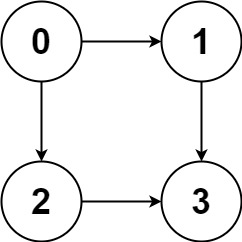

In [17]:
Image(filename='all_1.jpg') 

Input: graph = [[1,2],[3],[3],[]]

Output: [[0,1,3],[0,2,3]]

Explanation: There are two paths: 0 -> 1 -> 3 and 0 -> 2 -> 3.

In [5]:
def sol(graph):
    n = len(graph)- 1
    res = []
    def check_val(curr, path):
        return not curr in path
    def back(curr, path):
        nonlocal res
        if curr == n:
            res.append(path)
            return
        for ele in graph[curr]:
            if check_val(ele, path):
                back(ele, path + [ele])
    back(0,[0])
    return res
sol([[1,2],[3],[3],[]])

[[0, 1, 3], [0, 2, 3]]

Solution 1: Modifying the current result and using backtrack

In [6]:
def allPathsSourceTarget(graph):
    """
    :type graph: List[List[int]]
    :rtype: List[List[int]]
    """
    result =[]
    if not graph:
        return []
    n = len(graph)

    def back(current,fromNode):
        if fromNode ==  n-1 :
            result.append(list(current))
            return 

        for adjacent in graph[fromNode]:
            current.append(adjacent)            
            back(current,adjacent)
            current.pop()

    back([0],0)
    return result
allPathsSourceTarget([[1,2],[3],[3],[]])

[[0, 1, 3], [0, 2, 3]]

Common Mistake: In python, if both A and B are list, using A.append(B) and modifying B(such as B.pop()), A would also be modified.

In [7]:
def allPathsSourceTarget( graph):
        """
        :type graph: List[List[int]]
        :rtype: List[List[int]]
        """
        result =[]
        if not graph:
            return []
        n = len(graph)
        def back(current,fromNode):
            if fromNode ==  n-1 :
                result.append(current)
                return 
            
            for adjacent in graph[fromNode]:
                current.append(adjacent)
                
                back(current,adjacent)
                current.pop()
                
        back([0],0)
        return result
allPathsSourceTarget([[1,2],[3],[3],[]])

[[0], [0]]

Solution 2: Don't modify the current result so it can be traced back

In [8]:
def allPathsSourceTarget(graph):
    """
    :type graph: List[List[int]]
    :rtype: List[List[int]]
    """
    result =[]
    if not graph:
        return []
    n = len(graph)
    
    def back(current,fromNode):
        if fromNode ==  n-1 :
            result.append(current)
            return 

        for adjacent in graph[fromNode]:
            back(current + [adjacent],adjacent)

    back([0],0)
    return result
allPathsSourceTarget([[1,2],[3],[3],[]])

[[0, 1, 3], [0, 2, 3]]

Common Mistake: You can't modify the current otherwise we can't trace back to previous state

In [9]:
def allPathsSourceTarget(graph):
    """
    :type graph: List[List[int]]
    :rtype: List[List[int]]
    """
    result =[]
    if not graph:
        return []
    n = len(graph)
    
    def back(current,fromNode):
        if fromNode ==  n-1 :
            result.append(current)
            return 

        for adjacent in graph[fromNode]:
            current = current +[adjacent]
            back(current,adjacent)

    back([0],0)
    return result
allPathsSourceTarget([[1,2],[3],[3],[]])

[[0, 1, 3], [0, 1, 2, 3]]

Complexity analysis

Time Complexity: $\mathcal{O}(2^N \cdot N)$

- There are $2^N$ paths in a graph, where N is the number of nodes because each node can be in the path or not.


- For each path, there could be at most $N-2$ intermediate nodes, i.e. it takes $\mathcal{O}(N)$ time to build a path.


Space Complexity: $\mathcal{O}(2^N \cdot N)$

# BackTracking with Memoization
As we can see, in worst cases backtracking could be very time consuming. When you use backtracking but get a time limit error, you probably need to do some memoization or apply DP algos.

Word Break II (LC 140)

Given a non-empty string s and a dictionary wordDict containing a list of non-empty words, add spaces in s to construct a sentence where each word is a valid dictionary word. Return all such possible sentences.

Note:

- The same word in the dictionary may be reused multiple times in the segmentation.
- You may assume the dictionary does not contain duplicate words.

Input:

s = "catsanddog"

wordDict = ["cat", "cats", "and", "sand", "dog"]

Output:
[
  "cats and dog",
  "cat sand dog"
]


In [11]:
#Naive backtracking approach:
def wordBreak(s, wordDict):
    """
    :type s: str
    :type wordDict: List[str]
    :rtype: List[str]
    """
    result = []
    n = len(s)
    if not s:
        return []
    if not wordDict:
        return []
    def back(current,start):
        if start >=n:
            result.append(current)
            return 
        for pos in range(start,n+1):
            if s[start:pos] in wordDict:
                back(current+[s[start:pos]],pos)
    back([],0)

    return [' '.join(i) for i in result]

In [13]:
wordBreak("catsanddog",["cat", "cats", "and", "sand", "dog"])

['cat sand dog', 'cats and dog']

However, the following example would run out of time. Also, this recursion will call the same part of substring multiple times. We need to consider to store intermidiary result.

In [23]:
s= "aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaabaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa"
wordDict = ["a","aa","aaa","aaaa","aaaaa","aaaaaa","aaaaaaa","aaaaaaaa","aaaaaaaaa","aaaaaaaaaa"]

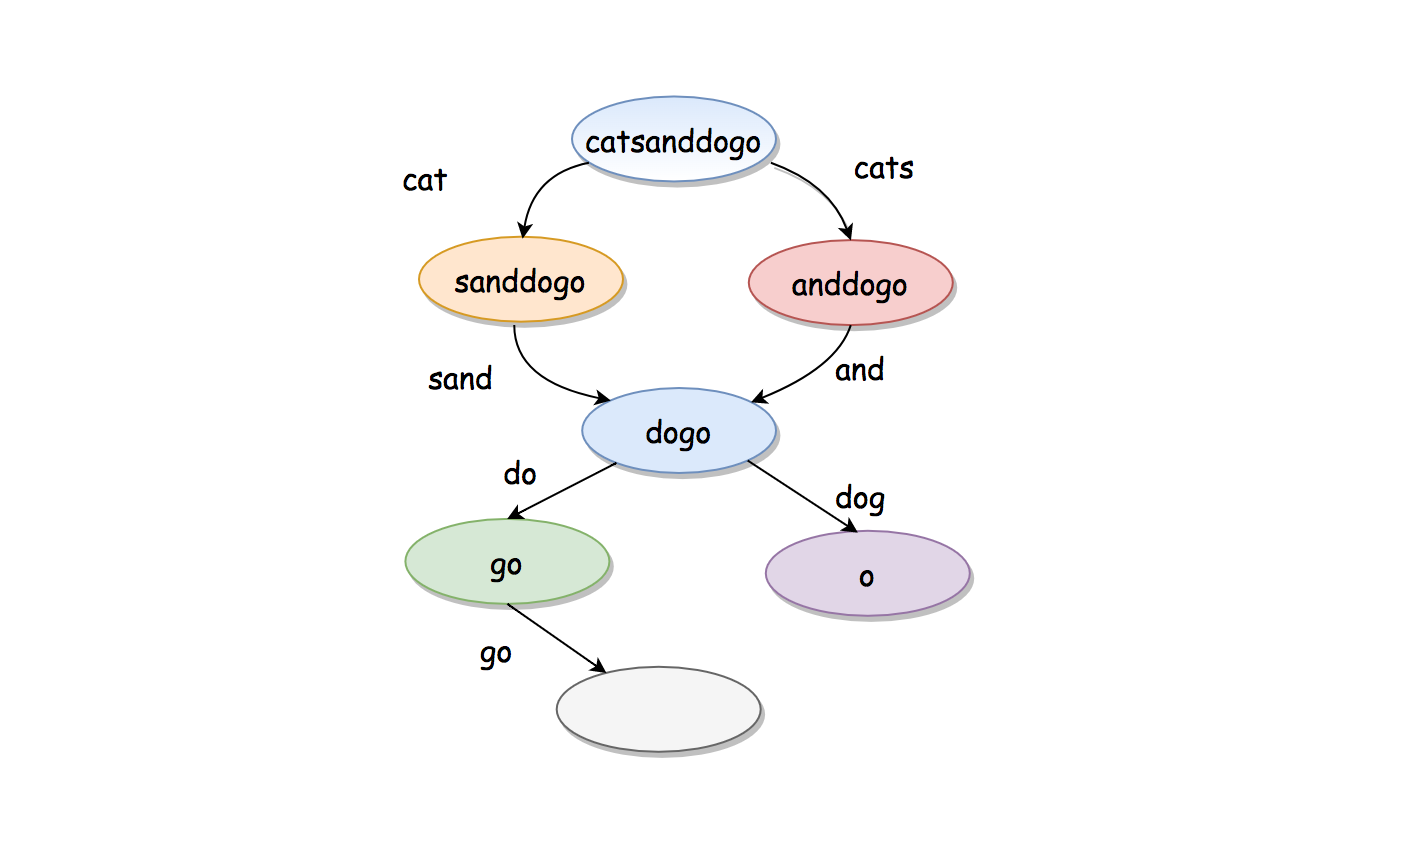

In [15]:
Image(filename='140_dp_memoization.png') 

Given an input string $\text{s} = \text{`catsanddog'}$, we define the results of breaking it into words with the function $\text{F(s)}$.

For any word (denoted as $\text{w}$) in the dictionary, if it matches with a prefix of the input string, we then can divide the string into two parts: the word and the postfix, i.e. $s = \text{w} + \text{postfix}$.

Consequently, the solution for the input string can be represented as follows:

$\forall \text{w} \in \text{dict}, \quad s = \text{w} + \text{postfix} \implies \{ \text{w} + \text{F(postfix)} \} \subseteq \text{F(s)}$

i.e. we add the matched word to the solutions from the postfix.

In [35]:
from collections import defaultdict
def wordBreak(s, wordDict):
    wordSet = set(wordDict)
    # table to map a string to its corresponding words break
    # {string: [['word1', 'word2'...], ['word3', 'word4', ...]]}
    memo = defaultdict(list)

    #@lru_cache(maxsize=None)    # alternative memoization solution
    def _wordBreak_topdown(s):
        """ return list of word lists """
        if not s:
            return [[]]  # list of empty list

        if s in memo:
            # returned the cached solution directly.
            return memo[s]

        for endIndex in range(1, len(s)+1):
            word = s[:endIndex]
            if word in wordSet:
                # move forwards to break the postfix into words
                for subsentence in _wordBreak_topdown(s[endIndex:]):
                    memo[s].append([word] + subsentence)
        print(s,memo)
        return memo[s]

    # break the input string into lists of words list
    _wordBreak_topdown(s)
    
    # chain up the lists of words into sentences.
    return [" ".join(words) for words in memo[s]]

Time Complexity $O(2^N)$:
- In the worst case, there could be N valid postfixes, i.e. each prefix of the input string is a valid word. For example, it is one of the worst cases with the input string as s='aaa' and the word dictionary as wordDict=["a", "aa", "aaa"].


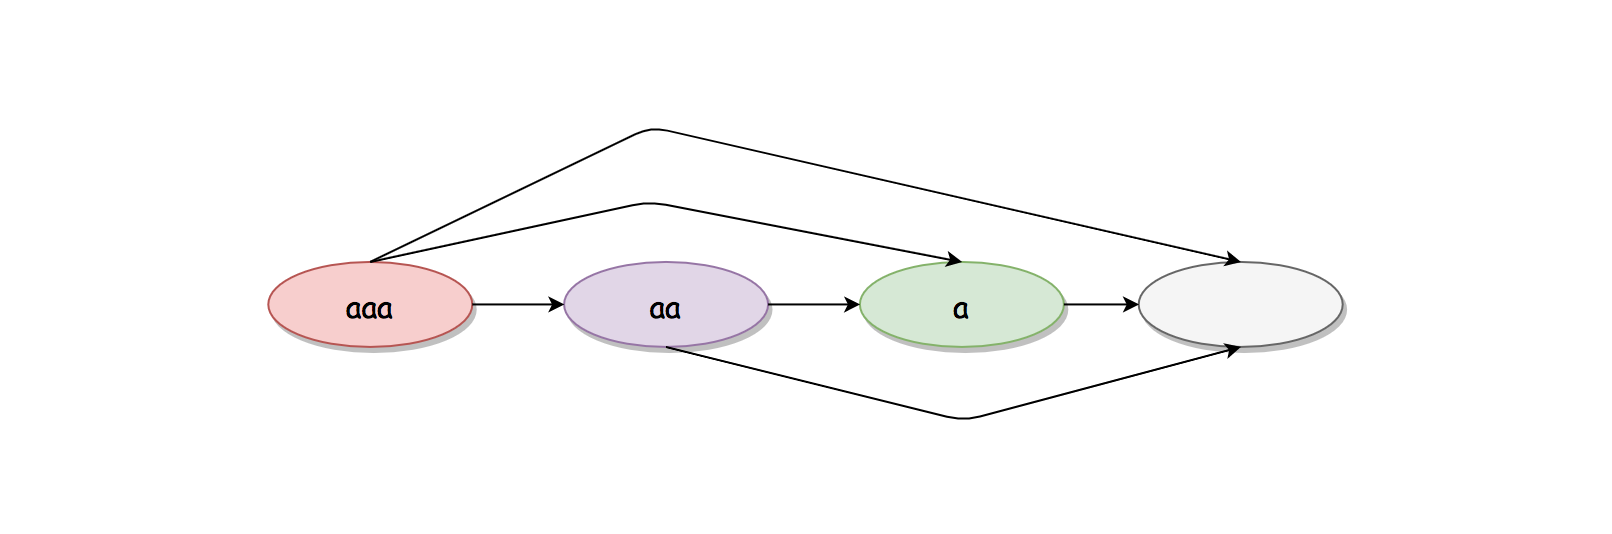

In [18]:
Image(filename='140_worst_case_example.png')

- At each visit of the edge, we need to iterate through the number of solutions that bring back by the edge. In the above worst case, each postfix of length i would have $2^{i-1}$ number of solutions, i.e. each edge brings back $2^{i-1}$ number of solution from the target postfix. Therefore, in total, we need $\mathcal{O}(\sum_{i=1}^{N}{2^{i-1}}) = \mathcal{O}(2^N)$ iterations to construct the final solutions.

$$T(n) = T(n-1) + T(n-2) +.....T(1)$$

- This algorithm improves on regular backtracking is in a case like this: "aaaaab", with wordDict = ["a", "aa", "aaa", "aaaa", "aaaaa", "aaaaa"], where no partition is valid due to the last letter 'b'. In this case there are no cached results, and the runtime improves from O(2^n) to O(n^2) which is the number of edges.

# Practice Problems
- Permutations (LC46)
- Beautiful Arrangement (LC526)
- Generate Parentheses (LC 22)
- Sudoku Solver (LC 37)